In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataL = np.load('LANGEVIN/N_70.npy')
dataN = np.load('NOSE_HOOVER_2/N_70.npy')

In [8]:
dataN.shape

(10100, 70, 3)

In [3]:
def gyration_radius(_input):
    return np.average(np.sum( (_input[:] - np.average(_input, axis=0))**2, axis=1 ))

In [4]:
gyration_radius(dataN[6245])

15.953411290874795

In [5]:
gr_L = []
gr_NH= []

for i in np.arange(10100):
    gr_L.append(gyration_radius(dataL[i]))
    gr_NH.append(gyration_radius(dataN[i]))


In [37]:
HISTO = np.concatenate((gr_L, gr_NH))
HISTO.reshape(2, 10100)

array([[102.7936577 , 100.01357843,  92.37394849, ...,  16.33978258,
         17.15360352,  19.80058542],
       [ 18.76151475,  19.80898858,  19.18670668, ...,  18.9770621 ,
         24.53820453,  21.99662412]])

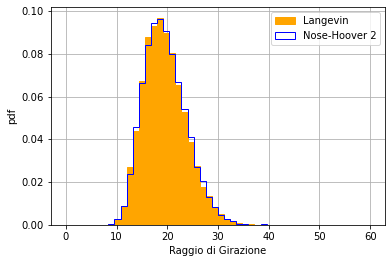

In [39]:
plt.hist(gr_L, bins=50, density=True, range =(0, 60), histtype='step', fill=True,  color='orange', label='Langevin', )
plt.hist(gr_NH,bins=50, density=True, range =(0, 60), histtype='step', fill=False, color='blue',   label='Nose-Hoover 2')

plt.xlabel('Raggio di Girazione')
plt.ylabel('pdf')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('distribuzione_RdG.png', dpi=1200)
plt.show()